In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Data Preparation

In [2]:
data_file_path='DATA.pkl'
data_orig=pd.read_pickle(data_file_path)
data_orig

,seq_no.,seq,module,motif_1,motif_2,motif_3,motif_4,motif_5,motif_string,motif_list
0,0,GGAGGAGGAAGAGGCTGGGCCCCTGCTGTGTGGGGGCAAGTTCCCA...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
1,1,CAAATACCCTGGGGTGCAATACGACTTATATCTCACGTATTGGAAG...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
2,2,AACTAGGACACAGAAGTTGATCTAACGTAAACATCAAGAGCTTCCT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
3,3,CACAGCTGGGCCTGGTTGGTCTTTGTCCAGGGAACAATGGAGCGCC...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
4,4,TTGTTTTATTTGTTTGTTGGGGGGCGGCGGGGAGCGACAGGGGAGT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
...,...,...,...,...,...,...,...,...,...,...
995,995,CTATTATTAAGAAATATACACAATTTTAACTTCAAATATCTCTCAT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
996,996,ATTGATTCTCACTTGCTTGACTCAAGGGAGGGTTTGATTTTGGTCA...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
997,997,ATGTGGTTCTACCATATAGTTTATCAATTTTAAACAGGTAAAATAT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
998,998,ATTTTGTTGGTTAGGTGATGGAAGTATGATGCTATTGATATTTCCC...,2,0.0,1.0,0.0,0.0,1.0,"motif_2,motif_5","[motif_2, motif_5]"


In [3]:
data_5_motif=data_orig.copy()
data_5_motif

,seq_no.,seq,module,motif_1,motif_2,motif_3,motif_4,motif_5,motif_string,motif_list
0,0,GGAGGAGGAAGAGGCTGGGCCCCTGCTGTGTGGGGGCAAGTTCCCA...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
1,1,CAAATACCCTGGGGTGCAATACGACTTATATCTCACGTATTGGAAG...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
2,2,AACTAGGACACAGAAGTTGATCTAACGTAAACATCAAGAGCTTCCT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
3,3,CACAGCTGGGCCTGGTTGGTCTTTGTCCAGGGAACAATGGAGCGCC...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
4,4,TTGTTTTATTTGTTTGTTGGGGGGCGGCGGGGAGCGACAGGGGAGT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
...,...,...,...,...,...,...,...,...,...,...
995,995,CTATTATTAAGAAATATACACAATTTTAACTTCAAATATCTCTCAT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
996,996,ATTGATTCTCACTTGCTTGACTCAAGGGAGGGTTTGATTTTGGTCA...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
997,997,ATGTGGTTCTACCATATAGTTTATCAATTTTAAACAGGTAAAATAT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
998,998,ATTTTGTTGGTTAGGTGATGGAAGTATGATGCTATTGATATTTCCC...,2,0.0,1.0,0.0,0.0,1.0,"motif_2,motif_5","[motif_2, motif_5]"


In [4]:
data_6_motif=data_5_motif.copy()
index=np.random.choice(data_5_motif.index, int(data_5_motif.shape[0]*0.1), replace=False)
data_6_motif.at[index,'motif_string']=data_6_motif.iloc[index]['motif_string'].apply(lambda x:x+',motif_6')
data_6_motif['motif_list']=data_6_motif['motif_string'].apply(lambda x:x.split(','))
data_6_motif

,seq_no.,seq,module,motif_1,motif_2,motif_3,motif_4,motif_5,motif_string,motif_list
0,0,GGAGGAGGAAGAGGCTGGGCCCCTGCTGTGTGGGGGCAAGTTCCCA...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
1,1,CAAATACCCTGGGGTGCAATACGACTTATATCTCACGTATTGGAAG...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
2,2,AACTAGGACACAGAAGTTGATCTAACGTAAACATCAAGAGCTTCCT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4,motif_6","[motif_1, motif_4, motif_6]"
3,3,CACAGCTGGGCCTGGTTGGTCTTTGTCCAGGGAACAATGGAGCGCC...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
4,4,TTGTTTTATTTGTTTGTTGGGGGGCGGCGGGGAGCGACAGGGGAGT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3,motif_6","[motif_2, motif_3, motif_6]"
...,...,...,...,...,...,...,...,...,...,...
995,995,CTATTATTAAGAAATATACACAATTTTAACTTCAAATATCTCTCAT...,0,0.0,1.0,1.0,0.0,0.0,"motif_2,motif_3","[motif_2, motif_3]"
996,996,ATTGATTCTCACTTGCTTGACTCAAGGGAGGGTTTGATTTTGGTCA...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
997,997,ATGTGGTTCTACCATATAGTTTATCAATTTTAAACAGGTAAAATAT...,1,1.0,0.0,0.0,1.0,0.0,"motif_1,motif_4","[motif_1, motif_4]"
998,998,ATTTTGTTGGTTAGGTGATGGAAGTATGATGCTATTGATATTTCCC...,2,0.0,1.0,0.0,0.0,1.0,"motif_2,motif_5","[motif_2, motif_5]"


# Task #2

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score

def randIndexMetric(predictions,data):
    pred_topic=[]
    for pred in predictions:
        topic_prob=sorted(pred,key=lambda x:-x[1])
#         print(topic_prob)
        top_topic=topic_prob[0][0]
        pred_topic.append(top_topic)
    _data=data.copy()
    _data['pred_topic']=pred_topic
    ari=adjusted_rand_score(_data['module'], _data['pred_topic'])
#     print(ari)
    return ari

## 5 Motifs

In [21]:
%%time
from gensim.corpora import Dictionary
from gensim.models import LdaModel,LdaMulticore

docs_5_motif=data_5_motif['motif_list'].values
dictionary_5_motif=Dictionary(docs_5_motif)
corpus_5_motif = [dictionary_5_motif.doc2bow(doc) for doc in docs_5_motif]

temp = dictionary_5_motif[0]
ari_5_motif_list=[]
num_runs=10
for i in tqdm(range(num_runs)):
    lda_5_motif = LdaModel(corpus_5_motif, 
                           id2word=dictionary_5_motif.id2token,
                           alpha='auto',
                           chunksize=10000,
                           eta='auto',
                           num_topics=3, 
                           iterations=1000, 
                           passes = 10,
                           minimum_probability=0.0
                          )
    predictions_5_motif=lda_5_motif.get_document_topics(corpus_5_motif,minimum_probability=0.0)
    ari_5_motif=randIndexMetric(predictions_5_motif,data_5_motif)
    ari_5_motif_list.append(ari_5_motif)
print('All ARIs:',ari_5_motif_list)    
print(f'Average ARI for 5 Motifs ({num_runs}) =',np.mean(ari_5_motif_list),'\n')

100%|██████████| 10/10 [00:54<00:00,  5.47s/it]

All ARIs: [1.0, 0.749221968230336, 0.9192853128937568, 0.9196194673051297, 0.9188377128056673, 1.0, 1.0, 0.9192853128937568, 0.9192853128937568, 0.9192853128937568]
Average ARI for 5 Motifs (10) = 0.926482039991616 

CPU times: user 54.8 s, sys: 125 ms, total: 54.9 s
Wall time: 54.8 s


In [22]:
%%time
from gensim.corpora import Dictionary
from gensim.models import LdaModel,LdaMulticore

docs_6_motif=data_6_motif['motif_list'].values
dictionary_6_motif=Dictionary(docs_6_motif)
corpus_6_motif = [dictionary_6_motif.doc2bow(doc) for doc in docs_6_motif]

temp = dictionary_6_motif[0]
ari_6_motif_list=[]
num_runs=10
for i in tqdm(range(num_runs)):
    lda_6_motif = LdaModel(corpus_6_motif, 
                           id2word=dictionary_6_motif.id2token,
                           alpha='auto',
                           chunksize=10000,
                           eta='auto',
                           num_topics=3, 
                           iterations=1000, 
                           passes = 10,
                           minimum_probability=0.0
                          )
    predictions_6_motif=lda_6_motif.get_document_topics(corpus_6_motif,minimum_probability=0.0)
    ari_6_motif=randIndexMetric(predictions_6_motif,data_6_motif)
    ari_6_motif_list.append(ari_6_motif)
print('All ARIs:',ari_6_motif_list)
print(f'Average ARI for 6 Motifs ({num_runs}) =',np.mean(ari_6_motif_list),'\n')

100%|██████████| 10/10 [00:55<00:00,  5.55s/it]

All ARIs: [0.9958103445808143, 0.7057176640107684, 0.00934676111751593, 0.0, 1.0, 0.9192853128937568, 1.0, 0.9192853128937568, 0.9192853128937568, 0.7370682128760147]
Average ARI for 6 Motifs (10) = 0.7205798921266383 

CPU times: user 55.4 s, sys: 70 ms, total: 55.4 s
Wall time: 55.5 s


# Task #3

In [38]:
%%time
param_grid_data_dict={'iterations':[],'passes':[],'Avg. ARI':[]}
iterations_list=[10,50,100,150,200,250]
passes_list=[1,3,5,7,9,11]
num_runs=10
for iterations in tqdm(iterations_list):
    for passes in passes_list:
        ari_5_motif_list=[]
        for i in range(num_runs):
            lda_5_motif = LdaModel(corpus_5_motif, 
                                   id2word=dictionary_5_motif.id2token,
                                   alpha='auto',
                                   chunksize=10000,
                                   eta='auto',
                                   num_topics=3, 
                                   iterations=iterations, 
                                   passes = passes,
                                   minimum_probability=0.0
                                  )

            predictions_5_motif=lda_5_motif.get_document_topics(corpus_5_motif,minimum_probability=0.0)
            ari_5_motif=randIndexMetric(predictions_5_motif,data_5_motif)
            ari_5_motif_list.append(ari_5_motif)
        param_grid_data_dict['iterations'].append(iterations)
        param_grid_data_dict['passes'].append(passes)
        param_grid_data_dict['Avg. ARI'].append(np.mean(ari_5_motif_list))
        
param_grid_data_df=pd.DataFrame.from_dict(param_grid_data_dict)
param_grid_data_df.to_csv('tasks-22_feb_2021-param_grid_data.csv',index=False)

100%|██████████| 6/6 [21:09<00:00, 211.54s/it]

CPU times: user 21min 2s, sys: 1.62 s, total: 21min 3s
Wall time: 21min 9s


No. of Topics = 3


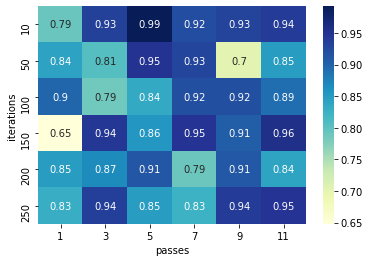

In [48]:
matrix=param_grid_data_df.pivot('iterations','passes','Avg. ARI')
sns.heatmap(matrix, annot=True, cmap="YlGnBu")
print('No. of Topics = 3')